In [3]:
#Installing yahoo finance
!pip install -q yfinance

     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 110 kB 9.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 4.0 MB 69.5 MB/s 
     |████████████████████████████████| 128 kB 78.8 MB/s 
     |████████████████████████████████| 112 kB 48.1 MB/s 


In [42]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [5]:
# Loading Data
# Defining the tickers or indices
tickers = ['BTC-USD', 'ETH-USD']

# Intializing the datetime as per today
end = datetime.now()
# Getting records of one year
start = datetime(end.year - 1, end.month, end.day)

# Extraction of stock data
df_btc= yf.download(tickers[0], start, end)
df_eth= yf.download(tickers[1], start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Important

**Closing Price**

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [113]:
# Bitcoin
df_btc.head()

# Exporting to csv
df_btc.to_csv('btc.csv')

In [7]:
# Summary Stats
df_btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,28246.648870,28784.336028,27586.789239,28165.940899,28165.940899,2.995700e+10
std,10227.591712,10440.684974,9973.931474,10202.226389,10202.226389,1.263524e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,9.419796e+09
25%,19547.362793,20038.028809,19151.910645,19544.809082,19544.809082,2.228343e+10
50%,23171.639648,23514.309570,22716.174805,23164.473633,23164.473633,2.810729e+10
75%,39136.011719,39833.101562,38113.451172,39054.864258,39054.864258,3.435698e+10
max,47680.925781,48086.835938,47100.437500,47686.812500,47686.812500,1.189925e+11


In [8]:
# Ethereum
df_eth.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466
2022-01-02,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548
2022-01-03,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
2022-01-04,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
2022-01-05,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502


In [9]:
# Summary Stats 
df_eth.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,1992.046829,2042.641632,1931.055200,1985.231315,1985.231315,1.527065e+10
std,779.154504,794.768931,758.526687,775.242520,775.242520,6.888655e+09
min,993.400635,1073.052612,896.109009,993.636780,993.636780,2.530078e+09
25%,1295.130402,1319.464417,1268.019073,1294.454102,1294.454102,1.064340e+10
50%,1686.611755,1734.032227,1619.690125,1673.279785,1673.279785,1.501931e+10
75%,2764.681274,2829.931091,2641.531494,2760.079163,2760.079163,1.853735e+10
max,3829.535645,3876.785156,3727.357422,3829.564941,3829.564941,4.574340e+10


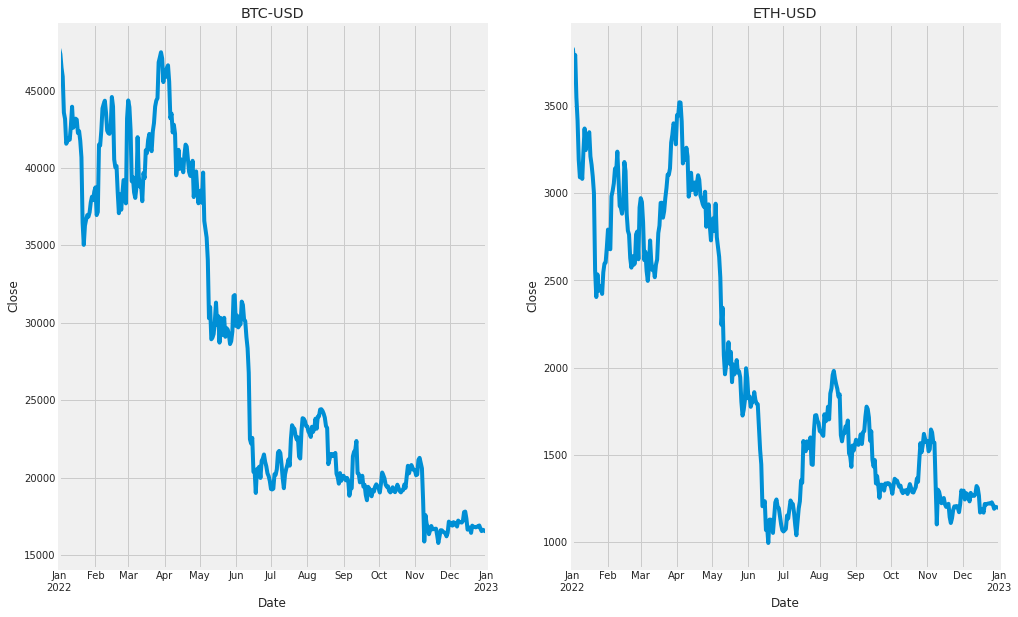

In [10]:
# Plotting for adj closing price

fig, axes = plt.subplots(1,2,figsize=(15, 10))
df_btc['Close'].plot(ax=axes[0])
axes[0].set_title("BTC-USD")
axes[0].set_ylabel('Close')
df_eth['Close'].plot(ax=axes[1])
axes[1].set_title("ETH-USD")
axes[1].set_ylabel('Close')

    
plt.show()

In [103]:
# Using MinMaxScaler to scale the Close Attribute

scaler=MinMaxScaler(feature_range=(0,1))
btc=scaler.fit_transform(np.array(df_btc['Close']).reshape(-1,1))

In [28]:

##splitting dataset into train and test split by 80% 
training_size=int(len(btc)*0.8)
test_size=len(btc)-training_size
train_data,test_data=btc[0:training_size,:],btc[training_size:len(btc),:1]

In [55]:
len(test_data)

74

In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [39]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
print(X_test.shape), print(ytest.shape)

(23, 50)
(23,)


(None, None)

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
'''
LSTM needs 3D shape therefore it needs to be change
'''
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [43]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train,validation_data=(X_test,ytest),epochs=500,batch_size=20,verbose=1)

In [72]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [73]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

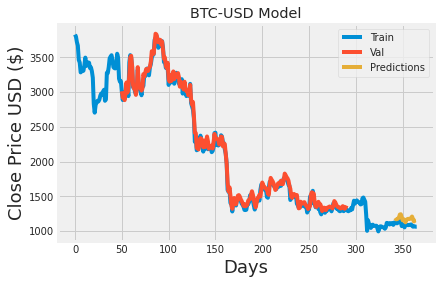

In [74]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(btc)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(btc)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(btc)-1, :] = test_predict


# plot baseline and predictions
plt.plot(scaler.inverse_transform(btc))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('BTC-USD Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [91]:
x_input=test_data[30:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(x_input)

[[0.02897418 0.01581678 0.         0.01261728 0.02581301 0.02561733
  0.02302723 0.02122279 0.02060666 0.01348102 0.0206178  0.04330102
  0.0369864  0.04079609 0.03514009 0.04210727 0.03722757 0.04082254
  0.03325575 0.04533579 0.04219085 0.04205205 0.04128303 0.04448822
  0.06250983 0.06358609 0.04945468 0.02696592 0.03159318 0.03042968
  0.02045157 0.03507953 0.03229675 0.03269821 0.03165153 0.03324412
  0.03306325 0.03550274 0.02915058 0.02399058 0.02680471 0.02555843
  0.02383145 0.02403919]]


In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=44
i=0
while(i<30):
    
    if(len(temp_input)>44):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

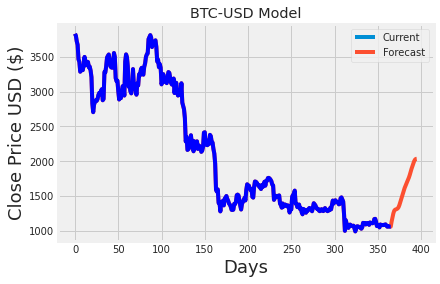

In [112]:
df3=btc.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
df3=scaler.inverse_transform(df3).tolist()
btc_1=scaler.inverse_transform(btc).tolist()

#Demonstrating the forecast values using a plot
plt.title('BTC-USD Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df3)
plt.plot(btc_1,color = "b")
plt.legend(['Current', 'Forecast'], loc='upper right')